In [696]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Telco-Customer-Churn-V2.csv")

print(data.head())


   gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No     1.0           No   
1    Male            No      No         No    34.0          Yes   
2    Male            No      No         No     2.0          Yes   
3    Male            No      No         No    45.0           No   
4  Female            No      No         No     2.0          Yes   

        MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  'No phone service'             DSL             No          Yes   
1                  No             DSL            Yes           No   
2                  No             DSL            Yes          Yes   
3  'No phone service'             DSL            Yes           No   
4                  No   'Fiber optic'             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes        

In [697]:
print(data.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [698]:

print(f"Número de columnas: {data.shape[1]}")

print(f"Número de cuentas: {data.shape[0]}")


Número de columnas: 20
Número de cuentas: 7043


In [699]:
data.info

<bound method DataFrame.info of       gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No     1.0           No   
1       Male            No      No         No    34.0          Yes   
2       Male            No      No         No     2.0          Yes   
3       Male            No      No         No    45.0           No   
4     Female            No      No         No     2.0          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes    24.0          Yes   
7039  Female            No     Yes        Yes    72.0          Yes   
7040  Female            No     Yes        Yes    11.0           No   
7041    Male           Yes     Yes         No     4.0          Yes   
7042    Male            No      No         No    66.0          Yes   

           MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     'No phone service'             DSL             No

In [700]:
print(data.dtypes)


gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


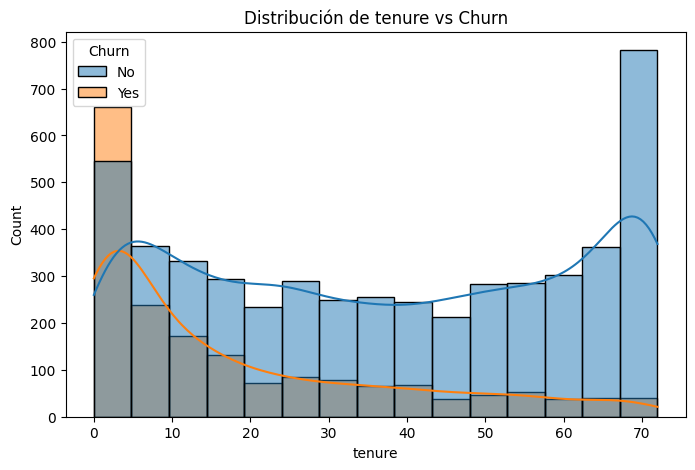

In [701]:
# Histograma de tenure vs churn
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True)
plt.title('Distribución de tenure vs Churn')
plt.show()


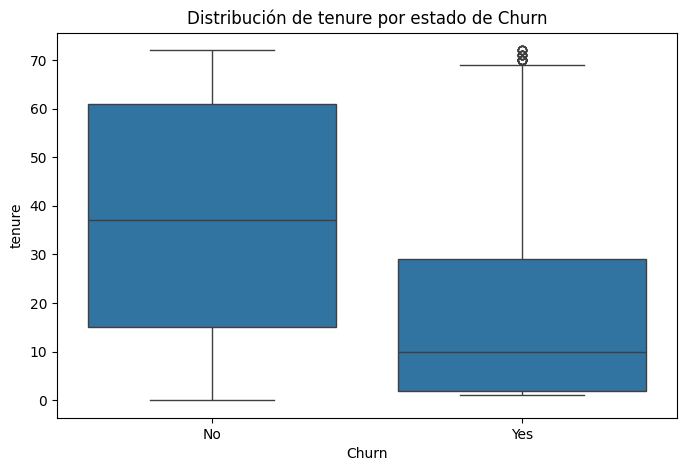

In [702]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Boxplot de tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Distribución de tenure por estado de Churn')
plt.show()

In [703]:
# Calculamos el porcentaje que equivalen los datos faltantes
missing_percentage = data.isnull().mean() * 100
# Eliminamos las columnas que tengan más del 30 porciento de datos faltantes
columns_to_drop = missing_percentage[missing_percentage > 30].index.tolist()
data = data.drop(columns=columns_to_drop)


tasa de abandono por categoria de servicio
permiten identificar qué variables podrían estar relacionadas con la tasa de abandono.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\4194814804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn'].fillna('No', inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\4194814804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

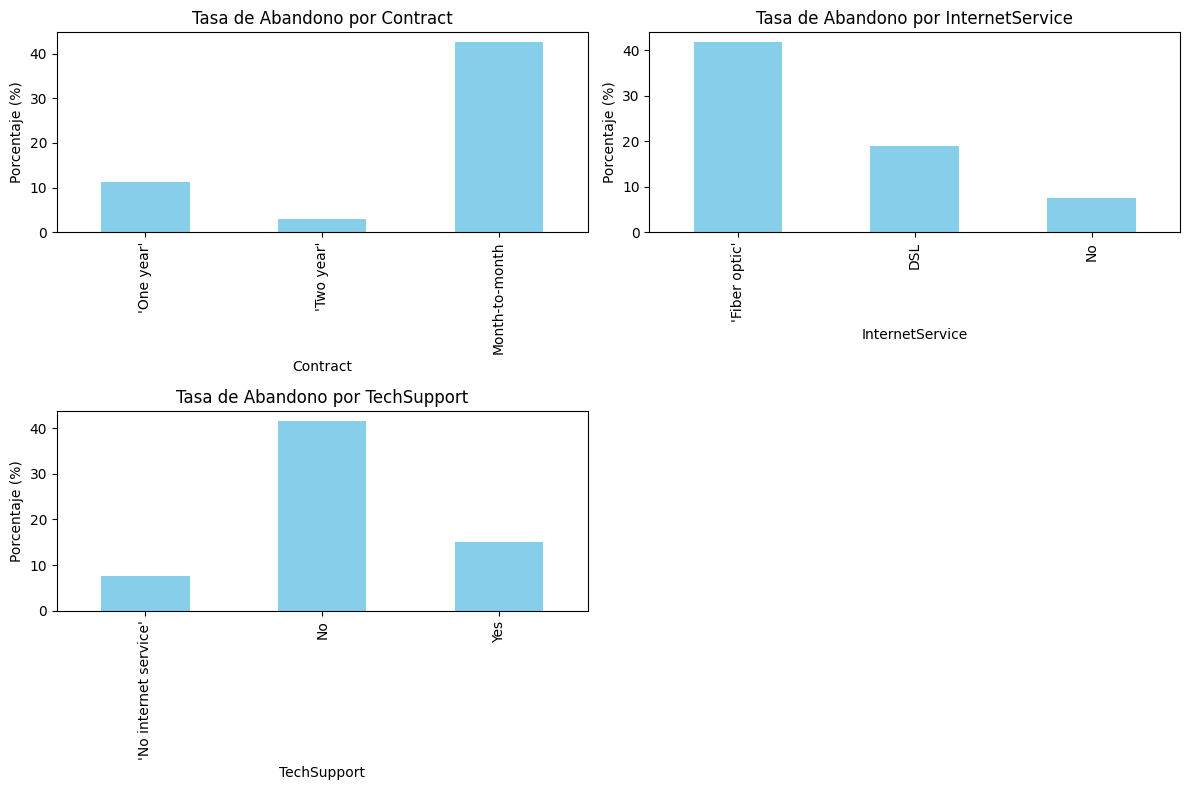

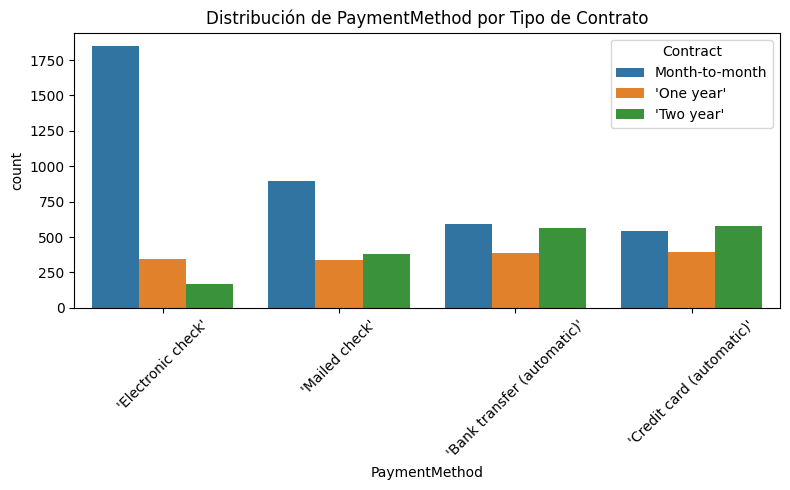

In [704]:
data['Churn'].fillna('No', inplace=True) 
data['tenure'].fillna(0, inplace=True)     

important_cols = ['Contract', 'InternetService', 'TechSupport']

plt.figure(figsize=(12, 8))

for i, col in enumerate(important_cols, 1):
    plt.subplot(2, 2, i)
    
    churn_rate = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes', 0) * 100
    churn_rate.plot(kind='bar', color='skyblue')
    plt.title(f"Tasa de Abandono por {col}")
    plt.ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='PaymentMethod', hue='Contract')
plt.title("Distribución de PaymentMethod por Tipo de Contrato")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


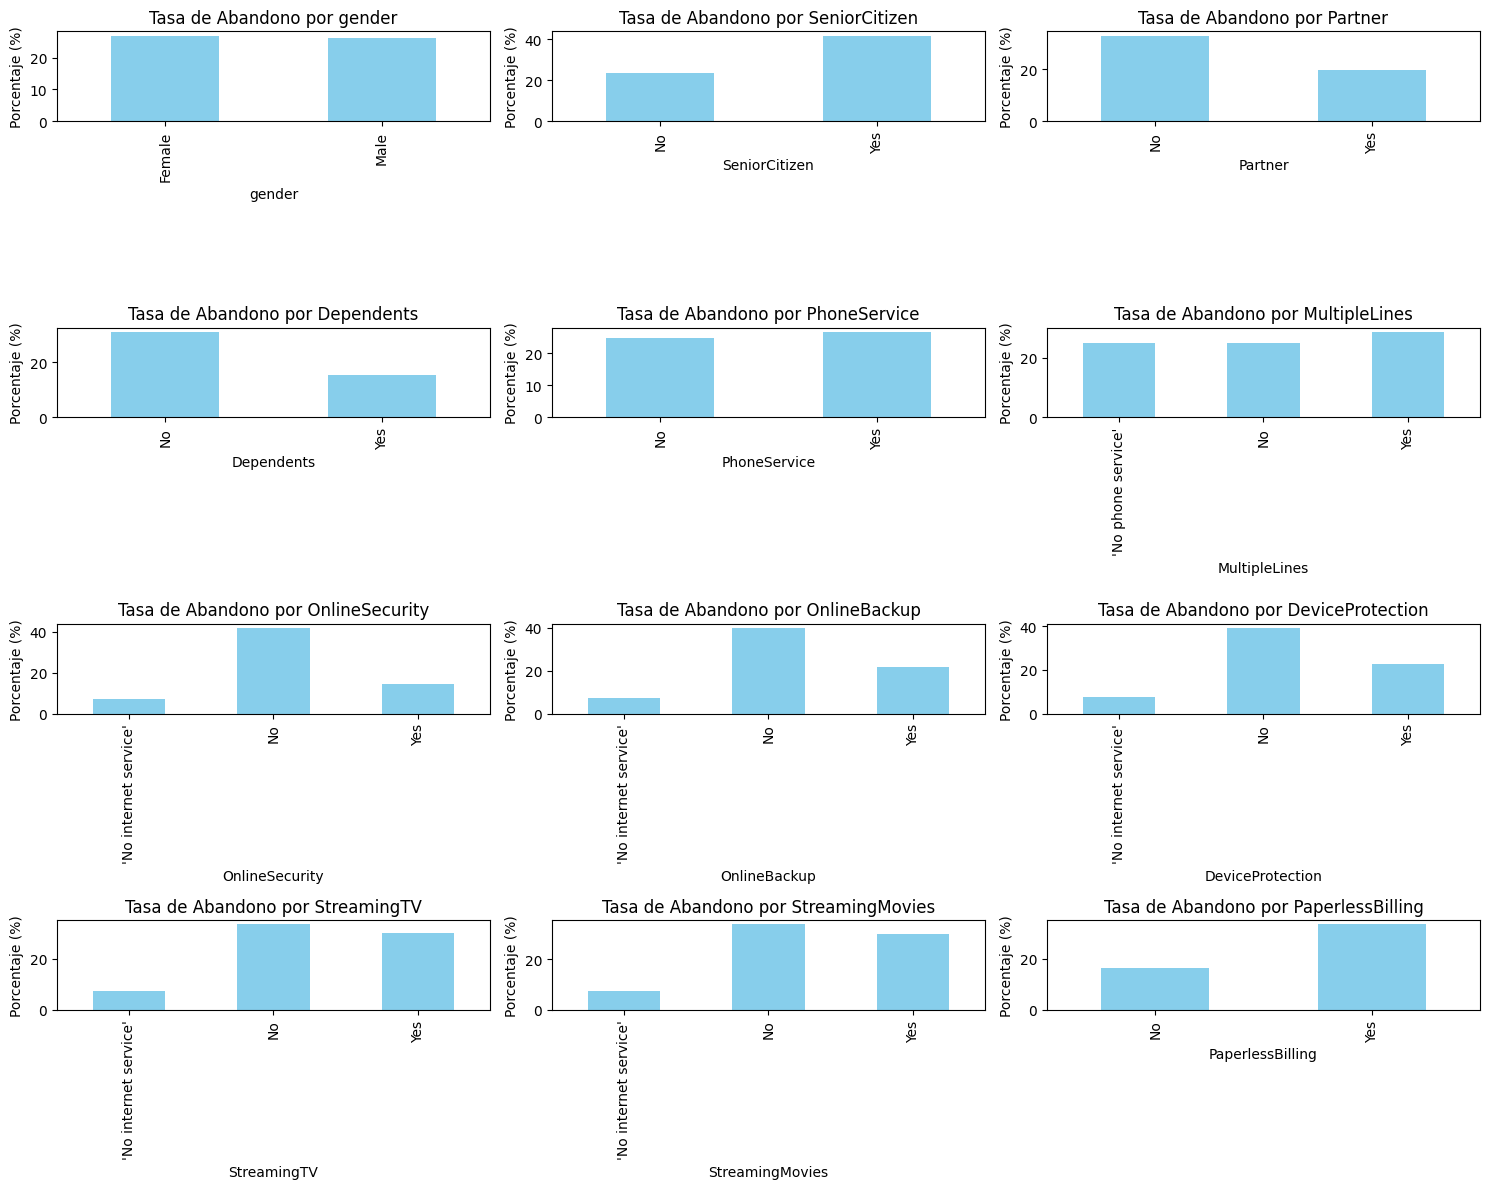

In [705]:


additional_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling']

plt.figure(figsize=(15, 12))

for i, col in enumerate(additional_cols, 1):
    plt.subplot(4, 3, i)
    churn_rate = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes', 0) * 100
    churn_rate.plot(kind='bar', color='skyblue')
    plt.title(f"Tasa de Abandono por {col}")
    plt.ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()


Preprocesamiento de datos 


In [706]:
print(data.isnull().sum())


gender                0
SeniorCitizen         0
Partner               0
Dependents           84
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity      162
OnlineBackup        167
DeviceProtection      0
TechSupport         162
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      188
TotalCharges        377
Churn                 0
dtype: int64


In [707]:

missing_percent = ((data.isnull().sum() / len(data)) * 100)
print(missing_percent)


gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          1.192674
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      2.300156
OnlineBackup        2.371149
DeviceProtection    0.000000
TechSupport         2.300156
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      2.669317
TotalCharges        5.352833
Churn               0.000000
dtype: float64


In [708]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

'No'
cols_fill_no = ['OnlineSecurity', 'OnlineBackup', 'TechSupport']
for col in cols_fill_no:
    data[col].fillna('No', inplace=True)

data['MonthlyCharges'].fillna(data['MonthlyCharges'].median(), inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'], inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\2419451707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\2419451707.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Decisión de tratamiento
Si el porcentaje es menor al 10% → Se recomienda imputar con la media, mediana o moda según el tipo de dato.

Si el porcentaje está entre 10% y 30% → Evaluar si la columna es importante; si lo es, se imputa; si no, se elimina.

Si el porcentaje es mayor al 30% → Se recomienda eliminar la columna porque puede afectar el análisis.

In [709]:

threshold = 30  # Porcentaje límite
cols_to_drop = missing_percent[missing_percent > threshold].index
data.drop(columns=cols_to_drop, inplace=True)

for col in missing_percent[missing_percent <= threshold].index:
    if data[col].dtype == 'object':  # Categóricas
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numéricas
        data[col].fillna(data[col].median(), inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\589212635.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\589212635.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [710]:
print(data.isnull().sum()) 


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Imputación de TotalCharges = MonthlyCharges × tenure

In [711]:

data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'], inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\3046580027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'], inplace=True)


Get dummies

In [712]:
data_encoded = pd.get_dummies(data, drop_first=True)

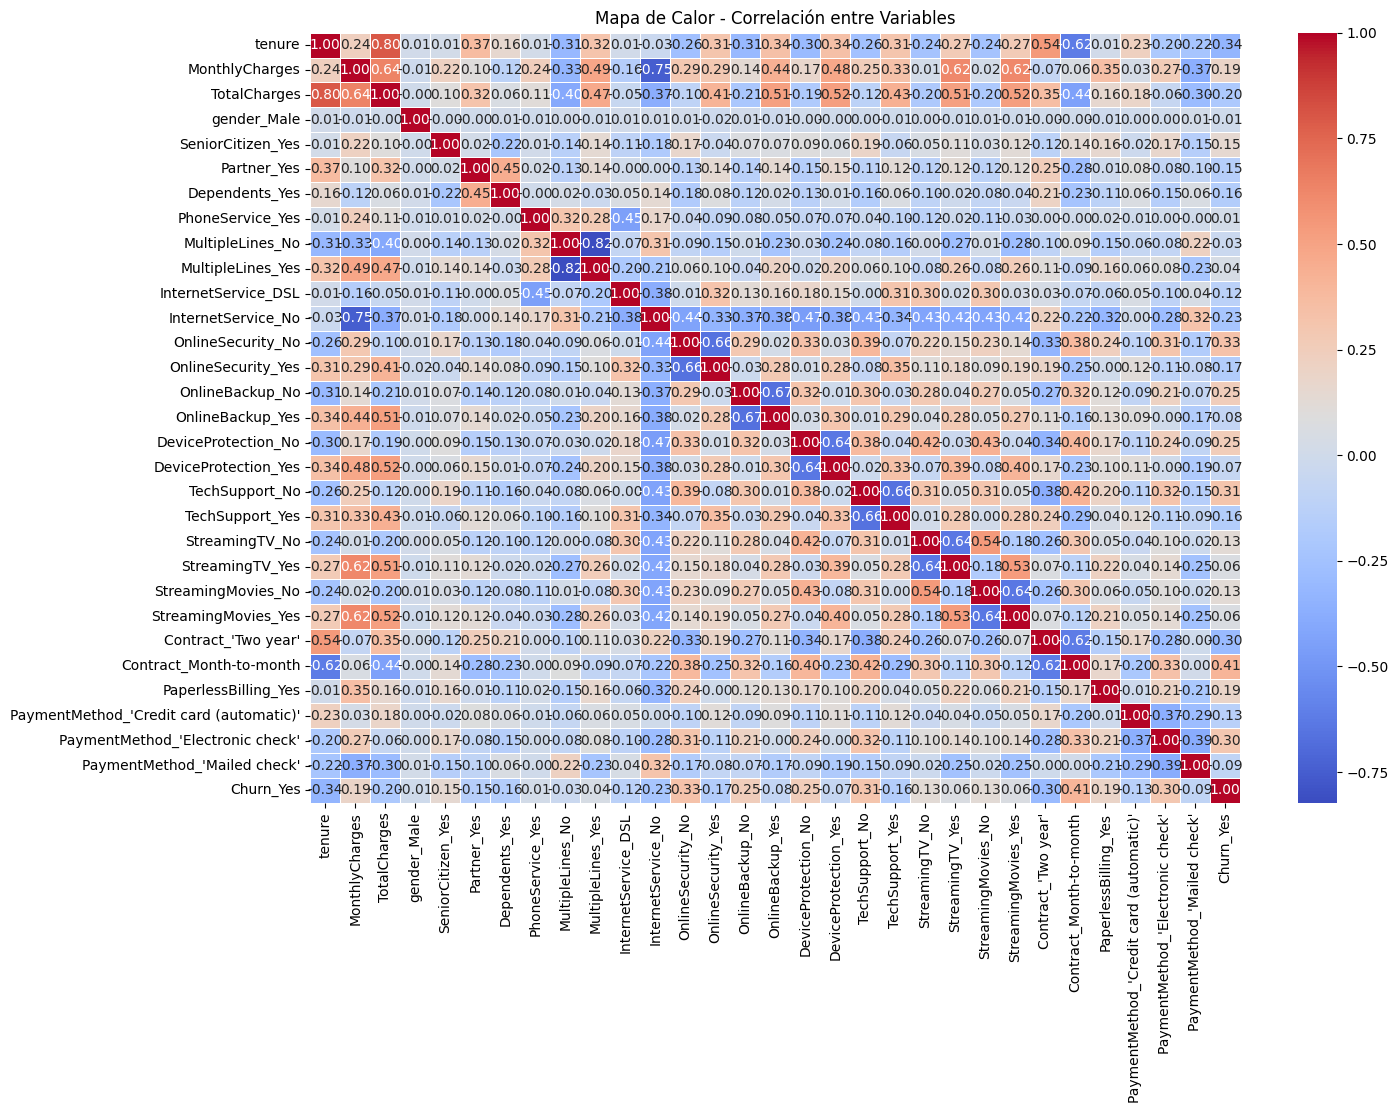

In [713]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlación entre Variables')
plt.show()

In [714]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Churn_Yes', axis=1)  # Variables independientes
y = data_encoded['Churn_Yes']                # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Tamaño de X_train: (4930, 30)
Tamaño de X_test: (2113, 30)


Distribución en el conjunto de entrenamiento:
Churn_Yes
False    73.732252
True     26.267748
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
Churn_Yes
False    72.834832
True     27.165168
Name: proportion, dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35024\157132126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='pastel')


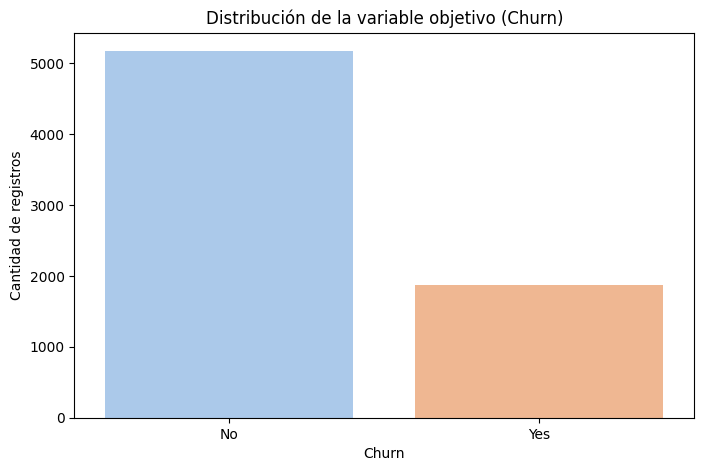

In [715]:

print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)


print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True) * 100)


plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Churn', palette='pastel')
plt.title('Distribución de la variable objetivo (Churn)')
plt.ylabel('Cantidad de registros')
plt.show()



Interpretación
False (No abandono):

73.73% en el conjunto de entrenamiento

72.83% en el conjunto de prueba

True (Sí abandono):

26.27% en el conjunto de entrenamiento

27.17% en el conjunto de prueba

##  Entrenamiento del modelo Perceptrón

In [716]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [717]:
from sklearn.linear_model import Perceptron


model = Perceptron(class_weight='balanced', max_iter=1000, tol=1e-3)
model.fit(X_train_scaled, y_train)


Perceptron(class_weight='balanced')

In [718]:

y_pred = model.predict(X_test_scaled)


In [719]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.88      0.67      0.76      1539
        True       0.45      0.75      0.56       574

    accuracy                           0.69      2113
   macro avg       0.66      0.71      0.66      2113
weighted avg       0.76      0.69      0.70      2113


Matriz de confusión:
 [[1024  515]
 [ 146  428]]

Precisión del modelo: 0.6871746332229058


## Analisis

 Análisis de los resultados
Precisión (precision):

Para la clase False: 0.88 (muy buena, pocos falsos positivos).

Para la clase True: 0.45 (bastante baja, demasiados falsos positivos).

Exhaustividad (recall):

Para la clase False: 0.67 (perdió muchos casos que realmente eran False).

Para la clase True: 0.75 (mejor que la precisión, lo que indica que el modelo captura bien los casos True, pero también clasifica mal otros como True).

Precisión global (accuracy): 0.69 → Esto indica que el modelo está correcto en el 69% de los casos, pero hay un desbalance en el rendimiento de cada clase.

<Figure size 600x400 with 0 Axes>

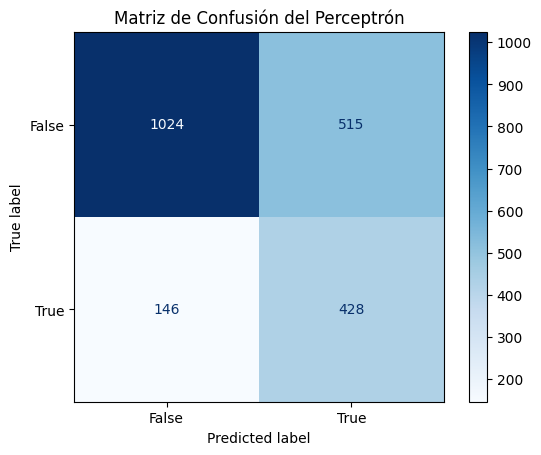

In [720]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title("Matriz de Confusión del Perceptrón")
plt.show()


## Mejoras en el perceptron 

In [721]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [722]:
perceptron = Perceptron(max_iter=1000, eta0=0.01, class_weight='balanced', random_state=42)
perceptron.fit(X_train_scaled, y_train)

y_pred = perceptron.predict(X_test_scaled)

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.84      0.61      0.71      1539
        True       0.40      0.70      0.51       574

    accuracy                           0.63      2113
   macro avg       0.62      0.65      0.61      2113
weighted avg       0.72      0.63      0.65      2113


Matriz de confusión:


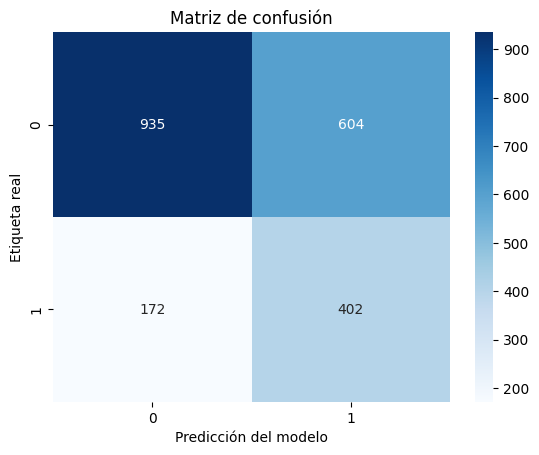

In [723]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.ylabel('Etiqueta real')
plt.xlabel('Predicción del modelo')
plt.show()

AUC-ROC Score: 0.70


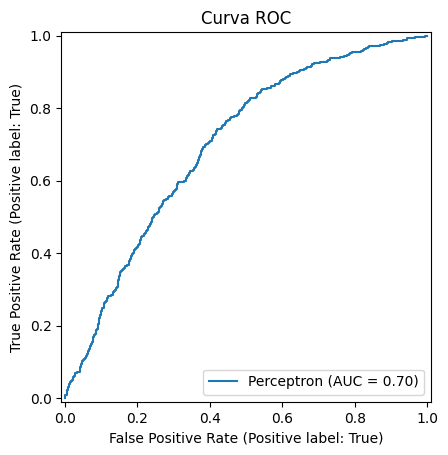

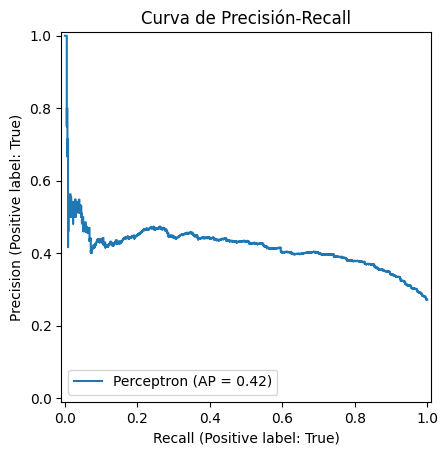

In [724]:
# Curva ROC-AUC
roc_auc = roc_auc_score(y_test, perceptron.decision_function(X_test_scaled))
print(f"AUC-ROC Score: {roc_auc:.2f}")

RocCurveDisplay.from_estimator(perceptron, X_test_scaled, y_test)
plt.title('Curva ROC')
plt.show()

# Curva de precisión-recall
PrecisionRecallDisplay.from_estimator(perceptron, X_test_scaled, y_test)
plt.title('Curva de Precisión-Recall')
plt.show()

## Adaline (Adaptive Linear Neuron)
Implementación del modelo Adaline, monitoreando la
evolución de la función de costo durante el entrenamiento.

In [725]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Clase Adaline (Adaptive Linear Neuron)
class Adaline:
    def __init__(self, learning_rate=0.0001, epochs=200):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.cost_history = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # +1 para el sesgo (bias)
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            errors = y - net_input
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_history.append(cost)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, 0)


In [726]:
adaline = Adaline(learning_rate=0.0005, epochs=200)
adaline.fit(X_train_scaled, y_train)

c:\Users\Usuario\anaconda3\envs\PERCEPTRON20242\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


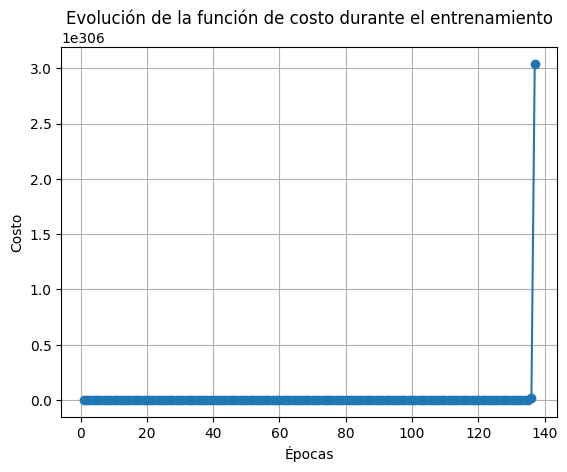

In [727]:
plt.plot(range(1, len(adaline.cost_history) + 1), adaline.cost_history, marker='o')
plt.title('Evolución de la función de costo durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Costo')
plt.grid(True)
plt.show()


In [728]:
y_pred = adaline.predict(X_test_scaled)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.67      0.53      0.59      1539
        True       0.19      0.29      0.23       574

    accuracy                           0.46      2113
   macro avg       0.43      0.41      0.41      2113
weighted avg       0.54      0.46      0.49      2113

Matriz de confusión:
 [[814 725]
 [406 168]]


AUC-ROC Score: 0.36


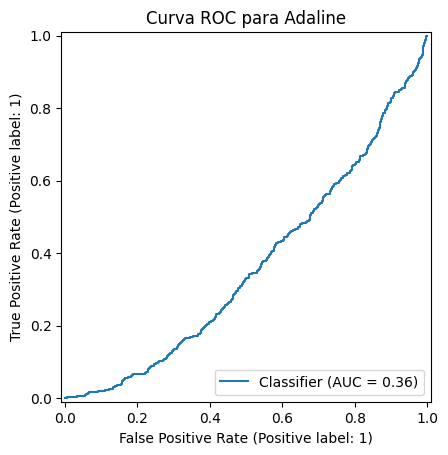

In [729]:
roc_auc = roc_auc_score(y_test, adaline.activation(X_test_scaled))
print(f"AUC-ROC Score: {roc_auc:.2f}")
RocCurveDisplay.from_predictions(y_test, adaline.activation(X_test_scaled))
plt.title('Curva ROC para Adaline')
plt.show()

In [730]:
adaline_predictions = adaline.predict(X_test_scaled)

from sklearn.metrics import recall_score
recall = recall_score(y_test, adaline_predictions)
print(f"Recall del modelo Adaline: {recall:.2f}")


Recall del modelo Adaline: 0.29


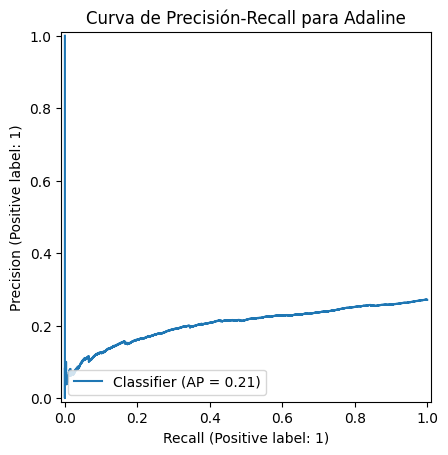

In [731]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, adaline.activation(X_test_scaled))
plt.title('Curva de Precisión-Recall para Adaline')
plt.show()


# Mejoras en el Adaline 

Para mejorar el rendimiento del modelo Adaline,  aplicar varias técnicas enfocadas en la optimización de parámetros, preprocesamiento de datos y ajustes en el algoritmo. como mejoras y cambiar el learning rate o el numero de epocas 

In [732]:
adaline = Adaline(learning_rate=0.001, epochs=200)
adaline.fit(X_train_scaled, y_train)


c:\Users\Usuario\anaconda3\envs\PERCEPTRON20242\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [733]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [734]:
from sklearn.linear_model import SGDClassifier

adaline = SGDClassifier(loss='squared_error', max_iter=1000, learning_rate='constant', eta0=0.001, class_weight='balanced')

adaline.fit(X_train_scaled, y_train)


SGDClassifier(class_weight='balanced', eta0=0.001, learning_rate='constant',
              loss='squared_error')

In [735]:
np.random.seed(42)
adaline = Adaline(learning_rate=0.001, epochs=200)
adaline.fit(X_train_scaled, y_train)

c:\Users\Usuario\anaconda3\envs\PERCEPTRON20242\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [736]:
class AdalineRidge(Adaline):
    def fit(self, X, y, alpha=0.01):
        self.weights = np.zeros(X.shape[1] + 1)
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            errors = y - net_input
            self.weights[1:] += self.learning_rate * (X.T.dot(errors) - alpha * self.weights[1:])
            self.weights[0] += self.learning_rate * errors.sum()


 Prueba 1: Ajuste del learning rate
Configuración: {'loss': 'squared_error', 'max_iter': 1000, 'learning_rate': 'constant', 'eta0': 0.01}
Recall: 0.43
AUC-ROC: 0.78
              precision    recall  f1-score   support

       False       0.81      0.90      0.85      1539
        True       0.61      0.43      0.50       574

    accuracy                           0.77      2113
   macro avg       0.71      0.66      0.68      2113
weighted avg       0.75      0.77      0.76      2113



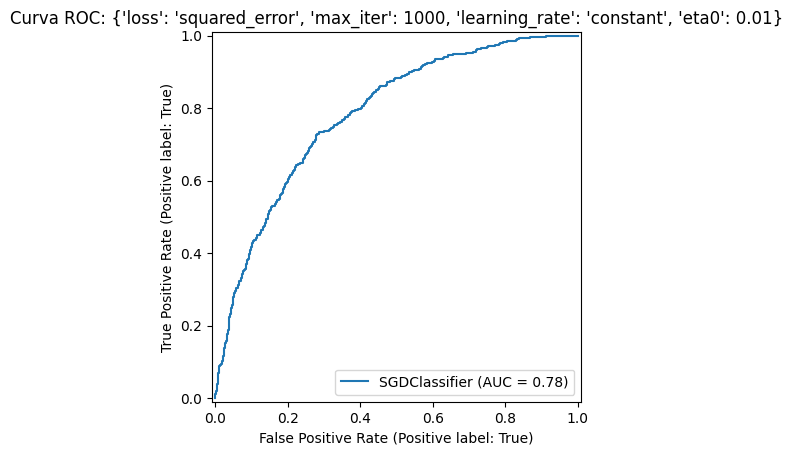

 Prueba 2: Aumento de épocas
Configuración: {'loss': 'squared_error', 'max_iter': 3000, 'learning_rate': 'constant', 'eta0': 0.001}
Recall: 0.52
AUC-ROC: 0.85
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1539
        True       0.70      0.52      0.60       574

    accuracy                           0.81      2113
   macro avg       0.77      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



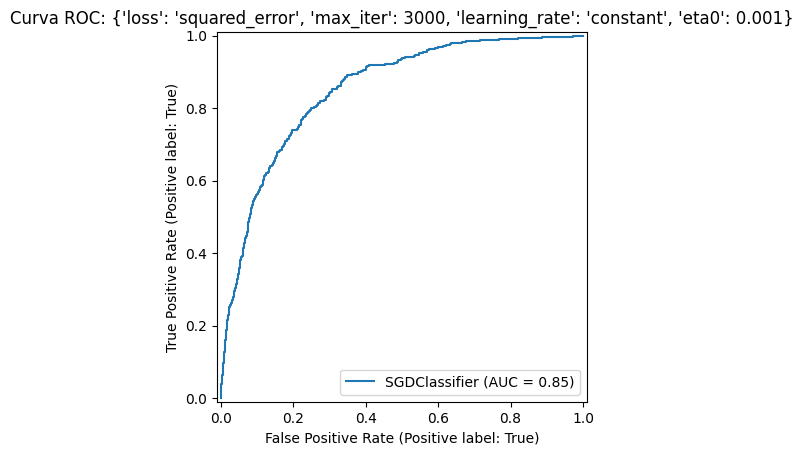

 Prueba 3: Early stopping
Configuración: {'loss': 'squared_error', 'max_iter': 1000, 'early_stopping': True, 'learning_rate': 'constant', 'eta0': 0.001}
Recall: 0.48
AUC-ROC: 0.84
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1539
        True       0.68      0.48      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



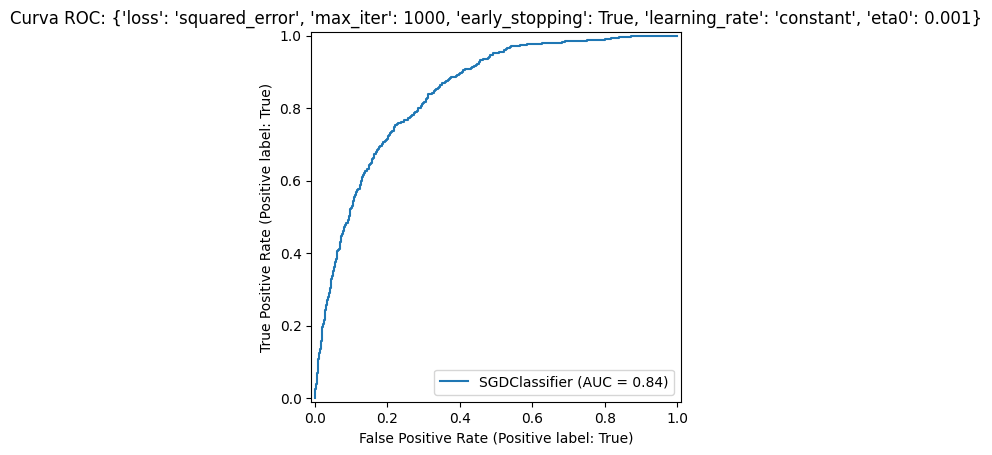

 Prueba 4: Class weight balance
Configuración: {'loss': 'squared_error', 'max_iter': 1000, 'learning_rate': 'constant', 'eta0': 0.001, 'class_weight': 'balanced'}
Recall: 0.84
AUC-ROC: 0.85
              precision    recall  f1-score   support

       False       0.92      0.71      0.80      1539
        True       0.52      0.84      0.64       574

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



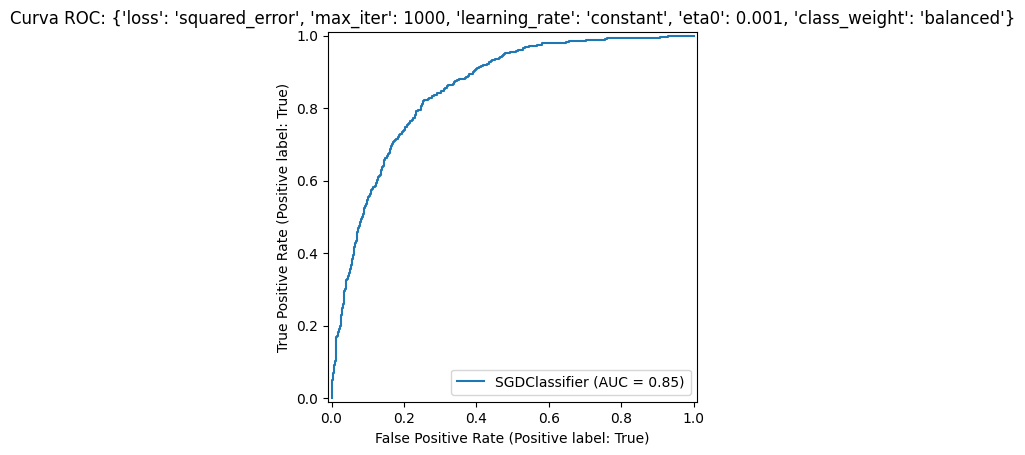

 Mejor combinación de técnicas
Configuración: {'loss': 'squared_error', 'max_iter': 3000, 'early_stopping': True, 'learning_rate': 'constant', 'eta0': 0.01, 'class_weight': 'balanced'}
Recall: 0.80
AUC-ROC: 0.78
              precision    recall  f1-score   support

       False       0.90      0.64      0.75      1539
        True       0.45      0.80      0.58       574

    accuracy                           0.68      2113
   macro avg       0.68      0.72      0.66      2113
weighted avg       0.78      0.68      0.70      2113



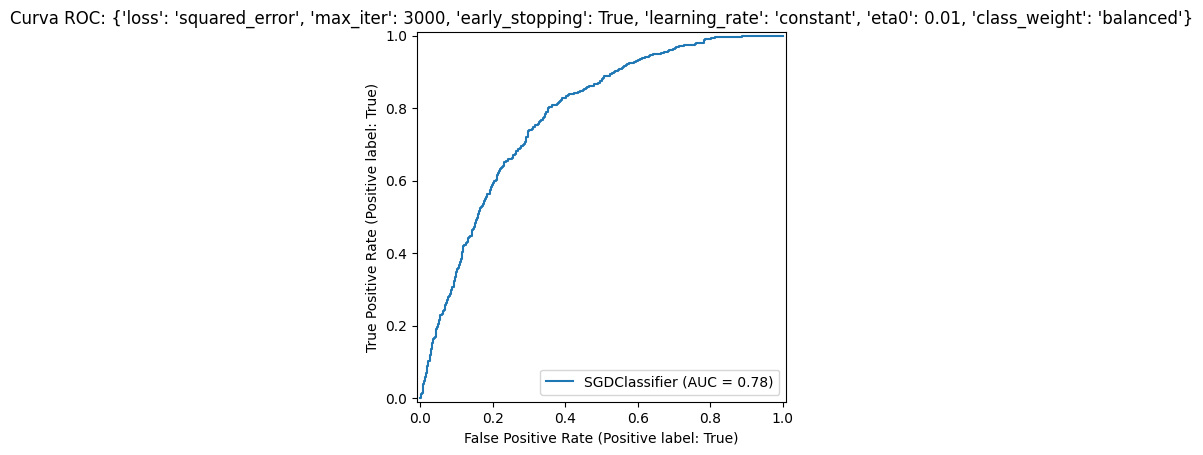

In [737]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, recall_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

def evaluar_adaline(params):
    adaline = SGDClassifier(**params)
    adaline.fit(X_train_scaled, y_train)
    

    y_pred = adaline.predict(X_test_scaled)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, adaline.decision_function(X_test_scaled))
    
    print(f"Configuración: {params}")
    print(f"Recall: {recall:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}")
    print(classification_report(y_test, y_pred))
    
    RocCurveDisplay.from_estimator(adaline, X_test_scaled, y_test)
    plt.title(f"Curva ROC: {params}")
    plt.show()


print(" Prueba 1: Ajuste del learning rate")
evaluar_adaline({'loss': 'squared_error', 'max_iter': 1000, 'learning_rate': 'constant', 'eta0': 0.01})

print(" Prueba 2: Aumento de épocas")
evaluar_adaline({'loss': 'squared_error', 'max_iter': 3000, 'learning_rate': 'constant', 'eta0': 0.001})

print(" Prueba 3: Early stopping")
evaluar_adaline({'loss': 'squared_error', 'max_iter': 1000, 'early_stopping': True, 'learning_rate': 'constant', 'eta0': 0.001})

print(" Prueba 4: Class weight balance")
evaluar_adaline({'loss': 'squared_error', 'max_iter': 1000, 'learning_rate': 'constant', 'eta0': 0.001, 'class_weight': 'balanced'})

print(" Mejor combinación de técnicas")
evaluar_adaline({'loss': 'squared_error', 'max_iter': 3000, 'early_stopping': True, 'learning_rate': 'constant', 'eta0': 0.01, 'class_weight': 'balanced'})


Para determinar cuál mejora es la mejor, puedes comparar varios indicadores clave de rendimiento (KPI) como:

1. Precisión (Accuracy)
Mide el porcentaje de predicciones correctas. Útil cuando las clases están balanceadas.

2. Recall (Sensibilidad)
Evalúa qué tan bien el modelo detecta los casos positivos. Es clave si tu objetivo es minimizar los falsos negativos (importante en detección de fraudes, enfermedades, etc.).

3. Precision (Precisión)
Evalúa qué tan confiable es cuando el modelo predice un caso positivo. Es clave si quieres minimizar los falsos positivos.

4. F1-Score
Es el balance entre precisión y recall. Es útil cuando ambas métricas son importantes.

5. AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
Evalúa la capacidad del modelo para distinguir entre clases. Un valor cercano a 1 indica mejor rendimiento.



## Regresión Logística: Implementación de regresión logística, ajustando hiperparámetros para
 mejorar la precisión del modelo.

In [738]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Modelo base de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [739]:
y_pred = log_reg.predict(X_test_scaled)
print("Reporte de clasificación (modelo base):\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Reporte de clasificación (modelo base):
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1539
        True       0.68      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Matriz de confusión:
 [[1386  153]
 [ 251  323]]


In [740]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],   # Regularización
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                           param_grid, 
                           scoring='recall', 
                           cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='recall')

In [741]:
best_log_reg = grid_search.best_estimator_
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

Mejores parámetros encontrados: {'C': 0.01, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [742]:
y_best_pred = best_log_reg.predict(X_test_scaled)
print("Reporte de clasificación (mejor modelo):\n", classification_report(y_test, y_best_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_best_pred))

Reporte de clasificación (mejor modelo):
               precision    recall  f1-score   support

       False       0.92      0.71      0.80      1539
        True       0.52      0.84      0.64       574

    accuracy                           0.75      2113
   macro avg       0.72      0.78      0.72      2113
weighted avg       0.81      0.75      0.76      2113

Matriz de confusión:
 [[1097  442]
 [  91  483]]


AUC-ROC Score: 0.85


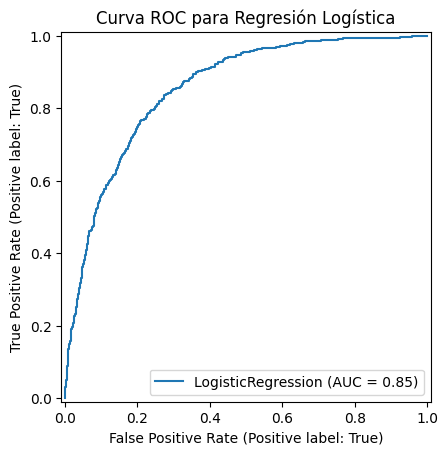

In [743]:
y_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {roc_auc:.2f}")
RocCurveDisplay.from_estimator(best_log_reg, X_test_scaled, y_test)
plt.title('Curva ROC para Regresión Logística')
plt.show()